In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [4]:
df = pd.read_csv("/content/heart.csv")
print("First 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

First 5 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol  

In [6]:
X = df.drop("target", axis=1)
y = df["target"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


LOGISTIC REGRESSION RESULTS
Accuracy: 0.7951219512195122

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



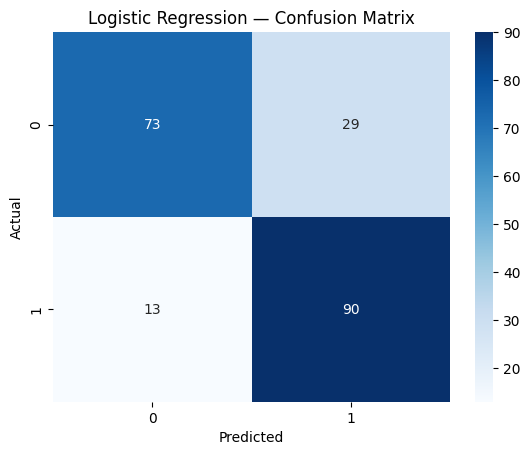

In [7]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

print("\n============================")
print("LOGISTIC REGRESSION RESULTS")
print("============================")

print("Accuracy:", accuracy_score(y_test, log_pred))
print("\nClassification Report:")
print(classification_report(y_test, log_pred))

cm = confusion_matrix(y_test, log_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression — Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


DECISION TREE RESULTS
Accuracy: 0.9853658536585366

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



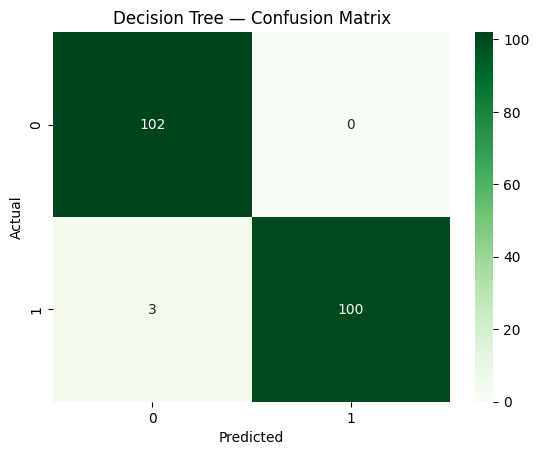

In [8]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print("\n========================")
print("DECISION TREE RESULTS")
print("========================")

print("Accuracy:", accuracy_score(y_test, dt_pred))
print("\nClassification Report:")
print(classification_report(y_test, dt_pred))

cm = confusion_matrix(y_test, dt_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Decision Tree — Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


RANDOM FOREST RESULTS
Accuracy: 0.9853658536585366

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



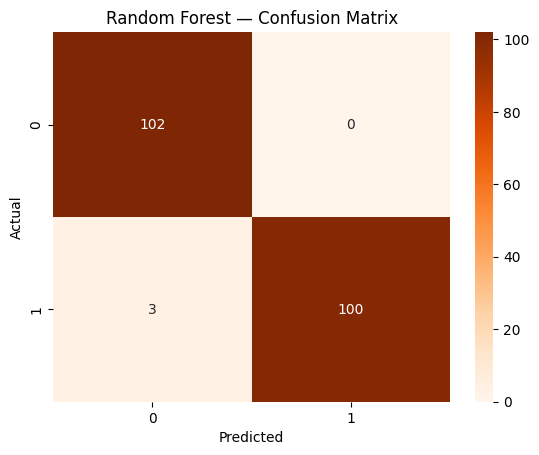

In [10]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("\n========================")
print("RANDOM FOREST RESULTS")
print("========================")

print("Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title("Random Forest — Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


KNN MODEL RESULTS
Accuracy: 0.8341463414634146

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.80      0.89      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



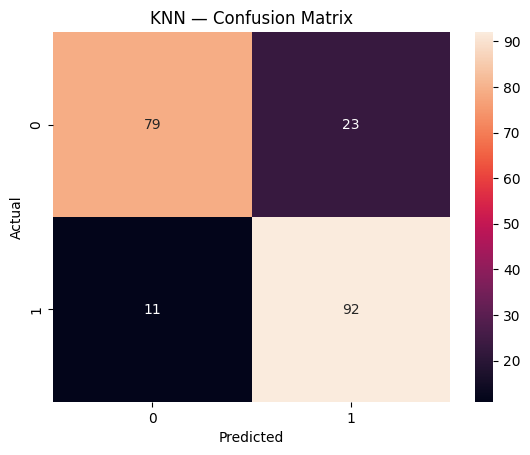

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print("\n====================")
print("KNN MODEL RESULTS")
print("====================")

print("Accuracy:", accuracy_score(y_test, knn_pred))

print("\nClassification Report:")
print(classification_report(y_test, knn_pred))

cm = confusion_matrix(y_test, knn_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="rocket")
plt.title("KNN — Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()